In [1]:
from tpe.optimizer import TPEOptimizer
import numpy as np
import matplotlib.pyplot as plt
import os
from tpe.utils.benchmarks import Styblinski


os.makedirs("figs/", exist_ok=True)

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 24
plt.rcParams['mathtext.fontset'] = 'stix'  # The setting of math fontZ

In [2]:
dx, dy = np.linspace(-1, 1, 20), np.linspace(-1, 1, 20)
X, Y = np.meshgrid(dx, dy)
Z = Styblinski.func2d(X, Y)
Z -= Z.min() - 1
Z = np.log(Z)

R = Styblinski._R
N_LEVELS = 100
LEVELS = np.linspace(Z.min(), Z.max(), N_LEVELS)
TICK_PARAMS = dict(labelbottom=False, bottom=False, labelleft=False, left=False)


def add_colorbar(fig, cb, axes):
    cbar = fig.colorbar(cb, ax=axes.ravel().tolist(), pad=0.02)
    cbar.ax.set_title("$f(x, y)$", y=1.01, fontsize=32)
    labels = [""] * N_LEVELS
    labels[-10], labels[10] = "Worse $\Longleftarrow$", "$\Longrightarrow$ Better"
    cbar.set_ticks(LEVELS)
    cbar.set_ticklabels(labels, fontsize=24)
    cbar.ax.set_yticklabels(cbar.ax.get_yticklabels(), rotation=270, va="center")
    # tick目盛りを削除
    cbar.ax.tick_params(size=0)
    return cb

def add_landscape(ax: plt.Axes):
    ax.tick_params(**TICK_PARAMS)
    cb = ax.contourf(X, Y, Z, levels=LEVELS)
    return cb

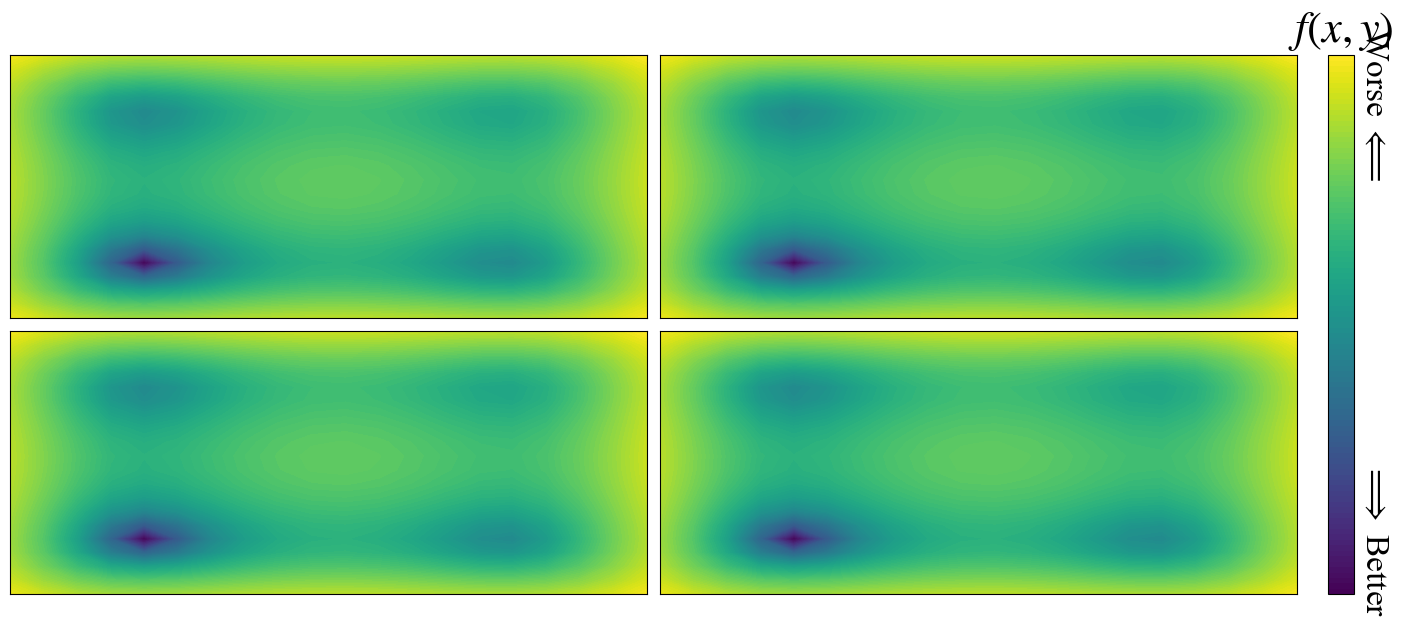

In [3]:
# Test the behavior
fig, axes = plt.subplots(
    ncols=2,
    nrows=2,
    figsize=(20, 3.5 * 2),
    gridspec_kw=dict(
        wspace=0.02,
        hspace=0.05
    )
)

for i in range(4):
    r, c = i // 2, i % 2
    ax = axes[r][c]
    cb = add_landscape(ax)
else:
    add_colorbar(fig, cb, axes)

## Multivariate

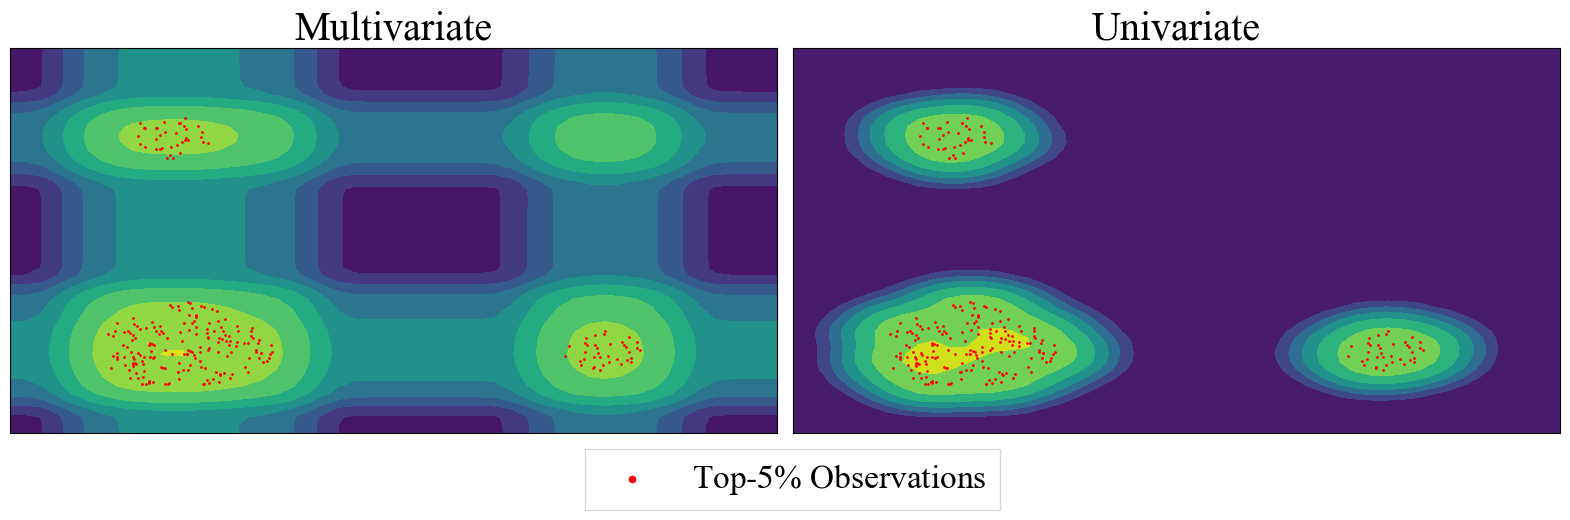

In [8]:
from parzen_estimator import MultiVariateParzenEstimator, NumericalParzenEstimator


_, axes = plt.subplots(
    ncols=2,
    figsize=(20, 5),
    gridspec_kw=dict(
        wspace=0.02,
        hspace=0.05
    ),
    sharex=True,
    sharey=True,
)

n_samples = 5000
X_FINER, Y_FINER = np.meshgrid(np.linspace(-1, 1, 50), np.linspace(-1, 1, 50))
rng = np.random.RandomState(42)
x, y = rng.random((2, n_samples)) * 2 - 1
z = Styblinski.func2d(x, y)
order = np.argsort(z)

n_top = n_samples // 20
x_top, y_top = x[order[:n_top]], y[order[:n_top]]
pe1 = NumericalParzenEstimator(lb=-1, ub=1, samples=x_top)
pe2 = NumericalParzenEstimator(lb=-1, ub=1, samples=y_top)
mpe = MultiVariateParzenEstimator({"x": pe1, "y": pe2})

shape = X_FINER.shape
pdf1 = pe1(X_FINER.flatten()).reshape(shape)
pdf2 = pe2(Y_FINER.flatten()).reshape(shape)
pdfs = [
    pdf1 * pdf2,
    mpe.pdf({"x": X_FINER.flatten(), "y": Y_FINER.flatten()}).reshape(shape)
]
titles = ["Multivariate", "Univariate"]

for ax, pdf, title in zip(axes, pdfs, titles):
    ax.tick_params(**TICK_PARAMS)
    ax.set_title(title)
    ax.contourf(X_FINER, Y_FINER, np.log(pdf))
    ax.scatter(x_top, y_top, color="red", s=1)
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
else:
    lines = [ax.scatter([-10, -10], [-10, -10], color="red", s=20)]

ax.legend(
    handles=lines,
    labels=["Top-$5$% Observations"],
    loc="upper center",
    fontsize=24,
    bbox_to_anchor=(0, 0),
    fancybox=False,
    shadow=False,
    ncol=1,
)

## The minimum bandwidth factor $b_{\min}$

## Weighting strategy

## Quantile funcs

## Sampling strategy